# Starbucks Capstone Challenge
**March 2020**

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

### Problem Statement

The data set that is going to be used for this project are simulated data that mimics customer behavior on the Starbucks rewards mobile app. As said, an offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks.
Not all users receive the same offer, or any offer. 

The goal is determine which kind of offer, if any, to send to each customer based on their purchases and interaction with the previously sent offers. So, building a machine learning model that predicts how Starbucks customers will respond to an offer based on demographics and offer type, is subject that will followed.

For demographic data for each customer, three type of classification supervised machine learning models, feeding in the data from three combine data (portfolio, profile, transactional) will be used: GaussianNB, Decision Tree and Support Vector Machine (SVM). Finally a Logistic Regression apply on data.


### Datasets and Inputs

The data consists of 3 files containing simulated data that mimics customer behavior on the Starbucks Rewards mobile app.

Portfolio.json contains info about the offers, profile.json contains info about the customers, and transcript.json contains info about customer purchases and interaction with the offers.

The data contain information about 10 offers: 4 BOGO, 4 discount, and 2 informational. It consist of 17,000 customers and a transcript containing 306,534 purchases and offer interactions.

A customer can interact with an offer by receiving it, viewing it, or completing it. It is possible for a customer to complete some offers without viewing them.

#### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

## Content:

1. [Exploratory Data Analysis](#exploratory) Reading data, Assess Datasets, Define cleaning items, Cleaning
    1. [Portfolio"](#portfolio)
    2. [Profile"](#profile)
    3. [Transcript](#transcript)
2. [Visualizing the Data](#graph)
3. [Data Modeling](#modeling)
    1. [Splitting Data](#split)
    2. [LogisticRegression](#lr)
    3. [GaussianNB Model](#gnb)
    4. [Decision Tree Classifier](#dtc)
    5. [Support Vector Machine](#svm)
    6. [Discussion](#dis)
    7. [Model Improvement](#improve)
4. [Conclusion](#con)

<a id='exploratory'></a>
### 1. Exploratory Data Analysis 

In this section, we read data, assess them and define what items should be clean.
>**Note**:
In this part, severl items may will added to change items lists for each dataset, but not necessary apply. The add as reminder to use if need in analyzing and modeling phases.

In [1]:
# import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

%matplotlib inline
base_color = sns.color_palette('deep')[0]



Bad key "text.kerning_factor" on line 4 in
/Users/alirafieh/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
# make a backup of the original data, in case needed later.
portfolio_bkup = portfolio.copy()
profile_bkup = profile.copy()
transcript_bkup = transcript.copy()

<a id='portfolio'></a>
### A. Portfolio

**portfolio.json** - containing offer ids and meta data about each offer (duration, type, etc.)

Here is the schema and explanation of each variable in it:
- id (string) - offer id
- offer_type (string) - type of offer ie BOGO, discount, informational
- difficulty (int) - minimum required spend to complete an offer
- reward (int) - reward given for completing an offer
- duration (int) - time for offer to be open, in days
- channels (list of strings)

In [4]:
portfolio.shape

(10, 6)

In [5]:
portfolio

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7  
5  2298d6c36e964ae4a3e7e9706d1fb8c2  
6  fafdcd668e3743c1bb461111dcafc2a4  
7  5a8bc65990b245e5a138643cd4eb9837  
8  f19421c1d4aa40978ebb69ca19b0e20d  
9  2906b810c7d4411798c6938adc9daaa5

In [6]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [7]:
portfolio.offer_type.unique()

array(['bogo', 'informational', 'discount'], dtype=object)

#### Portfolio dataset:

1. Change column name `id` to `offer_id`.
2. Turn duration numbers from *day* to *hour*.
3. Pivot `channels` column to four columns `web`, `email`, `mobile` and `social`. 

In [8]:
def clean_portfolio(portfolio):
    
    # Rename customer id column
    portfolio.rename(columns = {"id": "offer_id"}, inplace = True)
    
    # Change duration from days to hours
    portfolio.duration = portfolio.duration*24
    
    
    #change channels column as a dummy column..
    #for i in ['web', 'email', 'mobile', 'social']:
        #portfolio[i] = portfolio.channels.apply(lambda val: 1 if  i in val else 0)

    
    return portfolio

In [9]:
clean_portfolio(portfolio)

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10       168           bogo   
1      10  [web, email, mobile, social]          10       120           bogo   
2       0          [web, email, mobile]           0        96  informational   
3       5          [web, email, mobile]           5       168           bogo   
4       5                  [web, email]          20       240       discount   
5       3  [web, email, mobile, social]           7       168       discount   
6       2  [web, email, mobile, social]          10       240       discount   
7       0       [email, mobile, social]           0        72  informational   
8       5  [web, email, mobile, social]           5       120           bogo   
9       2          [web, email, mobile]          10       168       discount   

                           offer_id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7  
5  2298d6c36e964ae4a3e7e9706d1fb8c2  
6  fafdcd668e3743c1bb461111dcafc2a4  
7  5a8bc65990b245e5a138643cd4eb9837  
8  f19421c1d4aa40978ebb69ca19b0e20d  
9  2906b810c7d4411798c6938adc9daaa5

<a id='profile'></a>
### B. Profile

**profile.json** - demographic data for each customer

Here is the schema and explanation of each variable in it:
- age (int) - age of the customer
- became_member_on (int) - date when customer created an app account
- gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
- id (str) - customer id
- income (float) - customer's income

In [10]:
profile.head()

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

In [11]:
profile.shape

(17000, 5)

In [12]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [13]:
# check NaNs
profile.isna().sum(axis=0)

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [14]:
# check NaNs
portfolio.isna().sum(axis=0)

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
offer_id      0
dtype: int64

So there are lots 'NaN' cells in profile dataset that need to pay attention

In [15]:
profile[profile.isna().any(axis=1)]

gender  age                                id  became_member_on  income
0       None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212     NaN
2       None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712     NaN
4       None  118  a03223e636434f42ac4c3df47e8bac43          20170804     NaN
6       None  118  8ec6ce2a7e7949b1bf142def7d0e0586          20170925     NaN
7       None  118  68617ca6246f4fbc85e91a2a49552598          20171002     NaN
...      ...  ...                               ...               ...     ...
16980   None  118  5c686d09ca4d475a8f750f2ba07e0440          20160901     NaN
16982   None  118  d9ca82f550ac4ee58b6299cf1e5c824a          20160415     NaN
16989   None  118  ca45ee1883624304bac1e4c8a114f045          20180305     NaN
16991   None  118  a9a20fa8b5504360beb4e7c8712f8306          20160116     NaN
16994   None  118  c02b10e8752c4d8e9b73f918558531f7          20151211     NaN

[2175 rows x 5 columns]

In [16]:
profile[profile.isna().any(axis=1)].age.unique()

array([118])

In [17]:
profile.gender.unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [18]:
profile.groupby(profile.gender).count()

age    id  became_member_on  income
gender                                      
F       6129  6129              6129    6129
M       8484  8484              8484    8484
O        212   212               212     212

#### Profile dataset:

Here is changes on `profile` dataset:
1. It seems in `profile` dataset, all rows with `NaN` in `gender` and `income`, register with `age` ***118***. So, we can take it as outlier and drop these rows.
2. Change column name `id` to `customer_id`.
3. Extract year part from `become_member_on`. 
4. Numbering `gender` column as: `F` : *0*, `M`: *1* and `O`: *2* values.

In [19]:
def clean_profile(profile):
    
    # Drop null values in gender and income columns..
    profile.dropna(subset=['gender', 'income'], inplace = True)
    profile.drop(profile[profile.age == 118].index, inplace = True)
    
    # Rename customer id column
    profile.rename(columns = {"id": "customer_id"}, inplace = True)
    
    # Convert 'gender' column to: 'F': 0, 'M': 1 and 'O': 2
    profile['gender'] = profile['gender'].map({'F': '0', 'M':'1', 'O': '2'})
    
    # Extract year from 'became_member_on' column
    profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format = '%Y%m%d').dt.year
    
    return profile

In [20]:
clean_profile(profile)

gender  age                       customer_id  became_member_on  \
1          0   55  0610b486422d4921ae7d2bf64640c50b              2017   
3          0   75  78afa995795e4d85b5d9ceeca43f5fef              2017   
5          1   68  e2127556f4f64592b11af22de27a7932              2018   
8          1   65  389bc3fa690240e798340f5a15918d5c              2018   
12         1   58  2eeac8d8feae4a8cad5a6af0499a211d              2017   
...      ...  ...                               ...               ...   
16995      0   45  6d5f3a774f3d4714ab0c092238f3a1d7              2018   
16996      1   61  2cb4f97358b841b9a9773a7aa05a9d77              2018   
16997      1   49  01d26f638c274aa0b965d24cefe3183f              2017   
16998      0   83  9dc1421481194dcd9400aec7c9ae6366              2016   
16999      0   62  e4052622e5ba45a8b96b59aba68cf068              2017   

         income  
1      112000.0  
3      100000.0  
5       70000.0  
8       53000.0  
12      51000.0  
...         ...  
16995   54000.0  
16996   72000.0  
16997   73000.0  
16998   50000.0  
16999   82000.0  

[14825 rows x 5 columns]

<a id='transcript'></a>
### C. Transcript

**transcript.json** - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in it:
- event (str) - record description (ie transaction, offer received, offer viewed, etc.)
- person (str) - customer id
- time (int) - time in hours since start of test. The data begins at time t=0
- value - (dict of strings) - either an offer id or transaction amount depending on the record

In [21]:
transcript.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

In [22]:
transcript.tail(10)

person            event  \
306524  d613ca9c59dd42f497bdbf6178da54a7      transaction   
306525  eec70ab28af74a22a4aeb889c0317944      transaction   
306526  24f56b5e1849462093931b164eb803b5      transaction   
306527  24f56b5e1849462093931b164eb803b5  offer completed   
306528  5ca2620962114246ab218fc648eb3934      transaction   
306529  b3a1272bc9904337b331bf348c3e8c17      transaction   
306530  68213b08d99a4ae1b0dcb72aebd9aa35      transaction   
306531  a00058cf10334a308c68e7631c529907      transaction   
306532  76ddbd6576844afe811f1a3c0fbb5bec      transaction   
306533  c02b10e8752c4d8e9b73f918558531f7      transaction   

                                                    value  time  
306524                                  {'amount': 25.14}   714  
306525                                  {'amount': 43.58}   714  
306526                                  {'amount': 22.64}   714  
306527  {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...   714  
306528                                    {'amount': 2.2}   714  
306529                     {'amount': 1.5899999999999999}   714  
306530                                   {'amount': 9.53}   714  
306531                                   {'amount': 3.61}   714  
306532                     {'amount': 3.5300000000000002}   714  
306533                                   {'amount': 4.05}   714

In [23]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

As we intrested to analyze offer which are compelet or in transaction rather than received and view ones, so justthese two status of offer

In [24]:
transcript.shape  

(306534, 4)

In [25]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [26]:
#check how many unique key value are in column 'value'

list(set(val for dic in transcript.value for val in dic.keys())) 

['offer_id', 'reward', 'offer id', 'amount']

In [27]:
from collections import Counter
from itertools import chain
Counter(chain.from_iterable(e.keys() for e in list(transcript.value)))

Counter({'offer id': 134002,
         'amount': 138953,
         'offer_id': 33579,
         'reward': 33579})

#### Transcript dataset:

1. Change column `person` to `costumer_id`.
2. Create separate columns for `amount`, `reward` and `offer_id` from `value` column.
3. Pivot `offer_id` column to different type of offers by reading from `portfolio` dataset.
4. Select only `transaction` and `offer completed` from `event` column. Based on we want to decide how costumer response for an offer.
5. Pivot categorical `event` and `offer_type` columns by making dummies variables. 
6. Drop unnecessary columns.
7. Group by dataset by `customer_id`.

In [28]:
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [29]:
def clean_transcript(transcript):
    
       
    # Rename customer id column
    transcript.rename(columns = {"person": "customer_id"}, inplace = True)
    
    # Create separate columns for 'amount', 'reward' and 'offer_id' from 'value' column
    transcript = pd.concat([transcript.drop('value', axis = 1), pd.DataFrame(transcript['value'].tolist())], axis=1) 
    transcript.offer_id.fillna(transcript['offer id'], inplace = True)
    
    # Map offer type to offer id           
    offer_dic = pd.Series(portfolio.offer_type.values,index = portfolio.offer_id).to_dict()

    # Create 'offer_type' column 
    transcript['offer_type'] = transcript['offer_id'].map(offer_dic)
    
    # Separate rows which 'event' status are compelete or transaction
    transcript = transcript.loc[(transcript['event'] == 'offer completed') | (transcript['event'] == 'transaction')]
    
    # Pivot 'event' and 'offer_type' columns
    transcript = pd.get_dummies(transcript, columns=['event'], prefix = '', prefix_sep='')
    transcript= pd.get_dummies(transcript, columns = ['offer_type'], prefix = '', prefix_sep='')
    
    # Drop value column
    transcript.drop(['transaction','offer_id', 'offer id'], axis = 1, inplace = True)
    
    # sum all custumer's numeric data
    transcript = transcript.groupby('customer_id').sum().reset_index()
    
    return transcript

In [30]:
transcript = clean_transcript(transcript)

In [31]:
transcript

customer_id  time  amount  reward  \
0      0009655768c64bdeb2e877511632db8f  5862  127.60     9.0   
1      00116118485d4dfda04fdbaba9a87b5c  1224    4.09     0.0   
2      0011e0d4e6b944f998e987f904e8c1e5  3660   79.46    13.0   
3      0020c2b971eb4e9188eac86d93036a77  3864  196.86    14.0   
4      0020ccbbb6d84e358d3414a3ff76cffd  5700  154.05    13.0   
...                                 ...   ...     ...     ...   
16573  fff3ba4757bd42088c044ca26d73817a  3408  580.98     9.0   
16574  fff7576017104bcc8677a8d63322b5e1  3732   29.94     9.0   
16575  fff8957ea8b240a6b5e634b6ee8eafcf  1896   12.15     0.0   
16576  fffad4f4828548d1b5583907f2e9906b  5022   88.83    15.0   
16577  ffff82501cea40309d5fdd7edcca4a07  7236  226.07    18.0   

       offer completed  bogo  discount  
0                    3     1         2  
1                    0     0         0  
2                    3     1         2  
3                    3     1         2  
4                    3     2         1  
...                ...   ...       ...  
16573                3     1         2  
16574                3     1         2  
16575                0     0         0  
16576                3     3         0  
16577                6     1         5  

[16578 rows x 7 columns]

Now we can merge `transcript` and `profile` datasets based on share `customer_id`:

In [32]:
profile.shape

(14825, 5)

In [33]:
df = pd.merge(transcript, profile, on = 'customer_id', how = 'right')

In [34]:
df.shape

(14825, 11)

In [35]:
df.customer_id.nunique()

14825

In [36]:
df.isnull().sum()

customer_id           0
time                333
amount              333
reward              333
offer completed     333
bogo                333
discount            333
gender                0
age                   0
became_member_on      0
income                0
dtype: int64

In [37]:
# fill null value with 0
df.fillna(0, inplace = True)

In [38]:
df.head()

customer_id    time  amount  reward  offer completed  \
0  0009655768c64bdeb2e877511632db8f  5862.0  127.60     9.0              3.0   
1  0011e0d4e6b944f998e987f904e8c1e5  3660.0   79.46    13.0              3.0   
2  0020c2b971eb4e9188eac86d93036a77  3864.0  196.86    14.0              3.0   
3  0020ccbbb6d84e358d3414a3ff76cffd  5700.0  154.05    13.0              3.0   
4  003d66b6608740288d6cc97a6903f4f0  9174.0   48.34     9.0              3.0   

   bogo  discount gender  age  became_member_on   income  
0   1.0       2.0      1   33              2017  72000.0  
1   1.0       2.0      2   40              2018  57000.0  
2   1.0       2.0      0   59              2016  90000.0  
3   2.0       1.0      0   24              2016  60000.0  
4   0.0       3.0      0   26              2017  73000.0

<a id='graph'></a>
### 2. Visualizing the Data

In this section, review relation between different variables from datasets by graphs as part of data exploratory analysts.

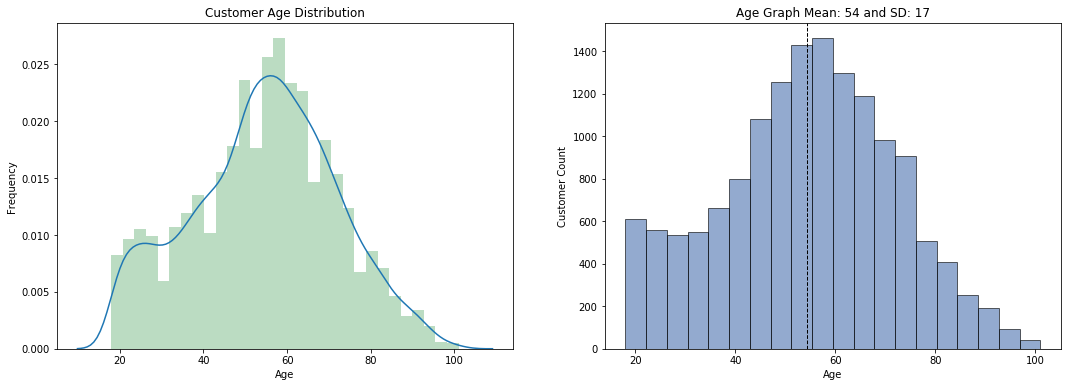

In [39]:
#plotting customers age and count of them

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.distplot(df.age,bins = 30, hist_kws = {'color': sns.color_palette('deep')[2]})
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency');

plt.subplot(1,2,2)
age_mean = df.age.mean()
age_stddev = df.age.std()
age_plot = df.age.plot(kind = 'hist', bins = 20, color = base_color, edgecolor = 'k',alpha = 0.60,
                       title=f"Age Graph Mean: {int(age_mean)} and SD: {int(age_stddev)}")
age_plot.axvline(age_mean, color ='k', linestyle='dashed', linewidth=1)
plt.xlabel('Age')
plt.ylabel('Customer Count');

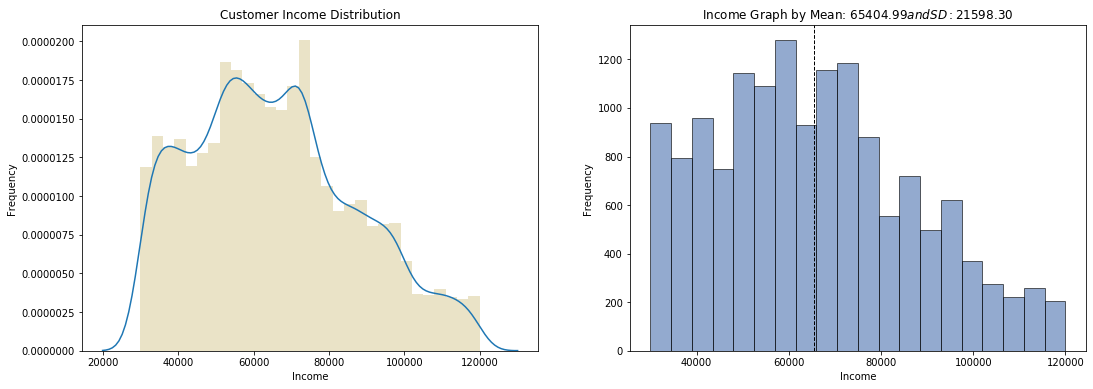

In [40]:
# check customer's income
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)
sns.distplot(df.income, bins = 30, hist_kws = {'color': sns.color_palette('deep')[8]})
plt.title('Customer Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency');

plt.subplot(1,2,2)
income_mean = df.income.mean()
income_stddev = df.income.std()
income_plot = df.income.plot(kind = 'hist', bins = 20, color = base_color, edgecolor = 'k', alpha = 0.60, 
                             title = f"Income Graph by Mean: ${income_mean:.2f} and SD: ${income_stddev:.2f}")
income_plot.axvline(profile.income.mean(), color = 'k', linestyle = 'dashed', linewidth=1)
plt.xlabel('Income')
plt.ylabel('Frequency');

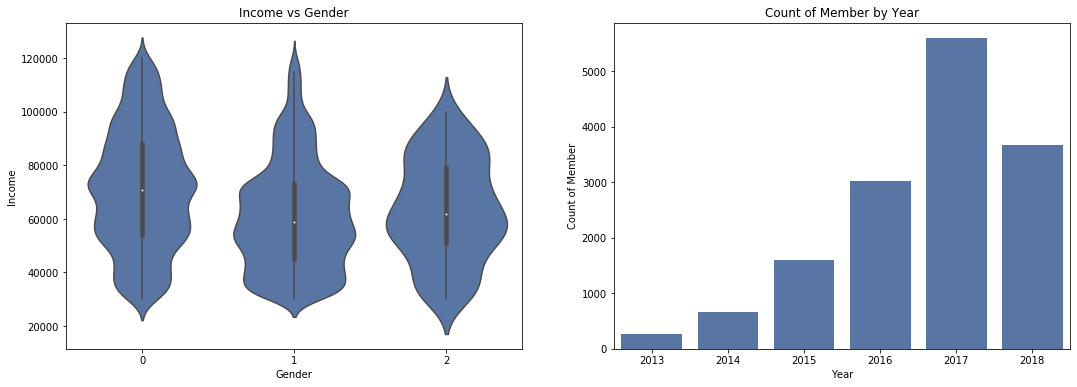

In [41]:
# check customer's income vs gender
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
sns.violinplot(df['gender'],df['income'], color = base_color)
plt.title('Income vs Gender')
plt.ylabel('Income')
plt.xlabel('Gender')


plt.subplot(1,2,2)
ax = sns.countplot(data = df, x = 'became_member_on', color = base_color)
ax.set(ylabel = "Count of Member")
ax.set(xlabel = "Year")
ax.set(title = 'Count of Member by Year');

<a id='modeling'></a>
### 3. Data Modeling

In this section, first select need variable for different models from final DataFrame (df), then splitting data and then run models based on following steps:
1. [Splitting Data](#split)
2. [LogisticRegression](#lr)
3. [GaussianNB Model](#gnb)
4. [Decision Tree Classifier](#dtc)
5. [Support Vector Machine](#svm)
6. [Discussion](#dis)
7. [Model Improvement](#improve)

In [42]:
# Selecting needed variable for all modeling
df_model = df[['time', 'offer completed', 'amount', 'reward','age' , 'gender' , 'income']]

In [43]:
df_model.isnull().sum()

time               0
offer completed    0
amount             0
reward             0
age                0
gender             0
income             0
dtype: int64

<a id='split'></a>
### Splitting Data
    

In [44]:
X = df_model[['time', 'amount', 'reward', 'age', 'gender', 'income']]
y = df_model['offer completed']

In [45]:
X.head()

time  amount  reward  age gender   income
0  5862.0  127.60     9.0   33      1  72000.0
1  3660.0   79.46    13.0   40      2  57000.0
2  3864.0  196.86    14.0   59      0  90000.0
3  5700.0  154.05    13.0   24      0  60000.0
4  9174.0   48.34     9.0   26      0  73000.0

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X.astype(float)))
                        
X_scaled.columns = X.columns
X_scaled.index = X.index
X_scaled.head()

time    amount    reward       age  gender    income
0  0.347811  0.079319  0.163636  0.180723     0.5  0.466667
1  0.217159  0.049394  0.236364  0.265060     1.0  0.300000
2  0.229263  0.122373  0.254545  0.493976     0.0  0.666667
3  0.338199  0.095761  0.236364  0.072289     0.0  0.333333
4  0.544322  0.030049  0.163636  0.096386     0.0  0.477778

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [48]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (11118, 6)
Training Labels Shape: (11118,)
Testing Features Shape: (3707, 6)
Testing Labels Shape: (3707,)


<a id='lr'></a>
### LogisticRegression

In [49]:
logreg_lib = LogisticRegression(solver='liblinear', max_iter=100000000)
logreg_lib.fit(X_train, y_train)
logreg_pred_lib = logreg_lib.predict(X_test)
print('AdaBoost Classifier F1 Score {}'.format(logreg_lib.score(X_train, y_train)))
print('AdaBoost Classifier Prediction Accuracy {}'.format(accuracy_score(y_test, logreg_pred_lib)))

AdaBoost Classifier F1 Score 0.5684475625112431
AdaBoost Classifier Prediction Accuracy 0.5573239816563259


In [50]:
logreg_lbfgs = LogisticRegression(solver='lbfgs', max_iter=100000000)
logreg_lbfgs.fit(X_train, y_train)
logreg_pred_lbfgs = logreg_lbfgs.predict(X_test)
print('AdaBoost Classifier F1 Score {}'.format(logreg_lbfgs.score(X_train, y_train)))
print('AdaBoost Classifier Prediction Accuracy {}'.format(accuracy_score(y_test, logreg_pred_lbfgs)))

AdaBoost Classifier F1 Score 0.5102536427415003
AdaBoost Classifier Prediction Accuracy 0.5090369571081738


/Users/alirafieh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
logreg_newton = LogisticRegression(solver='newton-cg', max_iter=100000000)
logreg_newton.fit(X_train, y_train)
logreg_pred_newton = logreg_newton.predict(X_test)
print('AdaBoost Classifier F1 Score {}'.format(logreg_newton.score(X_train, y_train)))
print('AdaBoost Classifier Prediction Accuracy {}'.format(accuracy_score(y_test, logreg_pred_newton)))

/Users/alirafieh/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/alirafieh/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


AdaBoost Classifier F1 Score 0.6610901241230437
AdaBoost Classifier Prediction Accuracy 0.6565956298893985


/Users/alirafieh/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [52]:
logreg_saga = LogisticRegression(solver='saga', max_iter=100000000)
logreg_saga.fit(X_train, y_train)
logreg_pred_saga = logreg_saga.predict(X_test)
print('AdaBoost Classifier F1 Score {}'.format(logreg_saga.score(X_train, y_train)))
print('AdaBoost Classifier Prediction Accuracy {}'.format(accuracy_score(y_test, logreg_pred_saga)))

AdaBoost Classifier F1 Score 0.3974635725849973
AdaBoost Classifier Prediction Accuracy 0.3968168330186134


In [53]:
logreg_sag = LogisticRegression(solver='sag', max_iter=100000000)
logreg_sag.fit(X_train, y_train)
logreg_pred_sag = logreg_sag.predict(X_test)
print('AdaBoost Classifier F1 Score {}'.format(logreg_sag.score(X_train, y_train)))
print('AdaBoost Classifier Prediction Accuracy {}'.format(accuracy_score(y_test, logreg_pred_sag)))

AdaBoost Classifier F1 Score 0.39998201115308507
AdaBoost Classifier Prediction Accuracy 0.4014027515511195


In `Logistic Regression`, base on [Scikit-learn documnets](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression), there are 5 solver, that default is `lbfgs`. All these solvers applied on our model, specially `sag` and `saga` would expect to have better result. But `newton-cg` has the best performance although it returned this warning: 'The line search algorithm did not converge'

The following table compare these solvers together:

|                              | **Solvers**|        |            |      |       |
|------------------------------|------------|--------|------------|------|-------|
| **Penalties**                |`liblinear` |`lbfgs` |`newton-cg` |`sag` |`saga` |
| Multinomial + L2 penalty     | no         | yes    | yes        | yes  | yes   |
| OVR + L2 penalty             | yes        | yes    | yes        | yes  | yes   |
| Multinomial + L1 penalty     | no         | no     | no         | no   | yes   |
| OVR + L1 penalty             | yes        | no     | no         | no   | yes   |
| Elastic-Net                  | no         | no     | no         | no   | yes   |
| No penalty (‘none’)          | no         | yes    | yes        | yes  | yes   |
| **Behaviors**                |            |        |            |      |       |
| Penalize the intercept (bad) | yes        | no     | no         | no   | no    |
| Faster for large datasets    | no         | no     | no         | yes  | yes   |
| Robust to unscaled datasets  | yes        | yes    | yes        | no   | no    |

<a id='gnb'></a>
### GaussianNB Model

In [54]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
gnb_pred = gnb_model.predict(X_test)

In [56]:
print('Gaussian Naive Bayes Classifier F1 Score {}'.format(gnb_model.score(X_train, y_train)))
print('Gaussian Naive Bayes Classifier Prediction Accuracy {}'.format(accuracy_score(y_test, gnb_pred)))

Gaussian Naive Bayes Classifier F1 Score 0.6125202374527793
Gaussian Naive Bayes Classifier Prediction Accuracy 0.6118154842190451


<a id='dtc'></a>
### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
dt_pred = dt.predict(X_test)

In [59]:
print('DecisionTreeClassifier F1 Score {}'.format(dt.score(X_train, y_train)))
print('DecisionTreeClassifier Predition Accuracy {}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier F1 Score 1.0
DecisionTreeClassifier Predition Accuracy 0.6652279471270569


<a id='svm'></a>
### Support Vector Machine

In [60]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
svm_pred = dt.predict(X_test)

In [62]:
print('SVM F1 Score {}'.format(svm.score(X_train, y_train)))
print('SVM Prediction Accuracy {}'.format(accuracy_score(y_test, svm_pred)))

SVM F1 Score 0.3630149307429394
SVM Prediction Accuracy 0.6652279471270569


<a id='dis'></a>
### Discussion

Based on the above results , it can be seen that scored 66.55% accuracy in the testing dataset by `Decision Tree Classifier` and `SVM` is the best result. It seems good here as there is binary target variable.

<a id='improve'></a>
### Model Improvement 

For model improvement, I select `Decision Tree` for improvement based on higher `F1` score.

In [63]:
from sklearn.model_selection import GridSearchCV

#Initialize the classifier
clf = DecisionTreeClassifier()

# Create the parameters list to tune.
parameters =  {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
# Perform grid search on the classifier  using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))

Unoptimized model
------
Accuracy score on testing data: 0.6636

Optimized Model
------
Final accuracy score on the testing data: 0.7178


It is a good improvement and seems no need further.

<a id='con'></a>
### 4. Conclusion

In this project, three dataset used as input data. First step was looking inside of these datasets, clean and prepared them based on factors want to analyze. In this step, tried to use best built-in function in `Pandas` to increase performance and reduced time rather than writing custom code.

Two of these datasets, `transcript` and `profile`, had been joined on their share column, `customer_id`. Then explore little deeper on datasets by plotting between variables.

In modeling section, 4 classification model apply on data: `Logistic Regression`, `GuassianNB`, `Decision Tree` and `SVM`. In `Regression Model`, all five **Solver**, which are in Scikit_learn, used and best result achieve by `newton-cg` although result by this solver are not converge. 

Between the rest models, `Decision Tree` and `SVM` have same accuracy of 66.55% (very near to `newton_cg` with 65.66%) and because `Decision Tree` has better `F1` score, this model selected for improvement by `GridSearch` technic and it increased to 71.78% accuracy which seems great.

Here is all models results on one table:

| Models                 |**Accuracy**|**F1 Score**|**Improvement Model**|
|:-----------------------|:--------:|:--------:|:-----------------:|
|**Logistic regression** |          |          |                   |
|liblinear               |0.5573239 |0.5684475 |                   |
| lbfgs                  |0.5090369 |0.5102536 |                   |
| newton-cg              |0.6565956 |0.6610901 |                   |
| saga                   |0.3968168 |0.3974635 |                   |
| sag                    |0.4014027 |0.3999820 |                   |
|**GaussianNB**          |0.6118154 |0.6125202 |                   |
|**Decision Tree**       |**0.6679255**| 1.0   |***0.7178***       |
|**Support Vector Machine**|0.6679255|0.3630149|                   |

#### Future Improvements

There are several improvement point for this project; following share some:
1. Using other tree-based classification like `Random forest` as result has been achieved.
2. Using different strategy on data variable modeling, like classification customers `age` to find their response.
3. Using different portion of train and test data, to see how different model response, specially `Logistic Regression`.
4. Working more on data visualization and using various `Univariate`, `Bivarian` and `Multivarient` explorations.

In [64]:
import shap

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


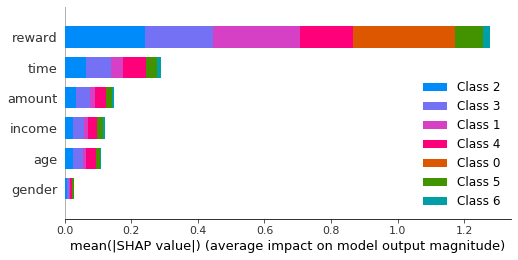

In [65]:
# explain the model's predictions using SHAP
explainer_dt = shap.TreeExplainer(dt)
shap_values_dt = explainer_dt.shap_values(X_train)

plt.figure(figsize=(18,6))
shap.summary_plot(shap_values_dt, X_train)


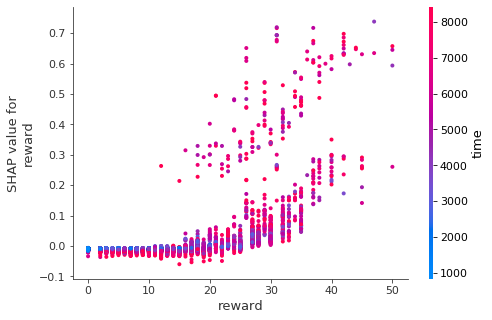

In [66]:
shap.dependence_plot('reward', shap_values_dt[6], X_train)

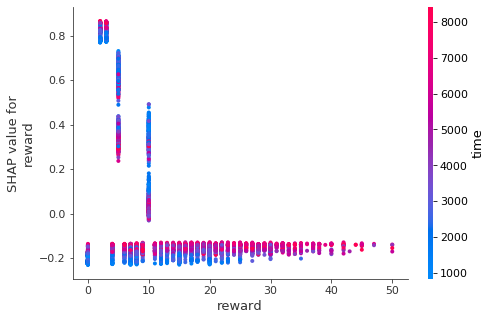

In [67]:
shap.dependence_plot('reward', shap_values_dt[1], X_train)

In [68]:
# visualize the first prediction's explanation 
shap.force_plot(explainer_dt.expected_value[1], shap_values_dt[1], X_train)


shap.force_plot is slow for many thousands of rows, try subsampling your data.


In [69]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(dt.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
S

time  amount  reward  age gender    income  predict
10050  2478.0   78.99    10.0   45      1   65000.0      1.0
3076   5964.0  135.52    18.0   28      1   39000.0      3.0
10580  3744.0  136.20    12.0   29      0   56000.0      2.0
8526   5532.0  136.95    38.0   50      1   43000.0      5.0
6853   2808.0   56.17    15.0   66      1   70000.0      2.0
11408  1620.0   78.54    15.0   92      1  113000.0      2.0
6720    972.0   29.77     5.0   60      0  104000.0      1.0

In [70]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(dt)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value[0], shap_values_Model[j][0], S.iloc[[j]])
    return(p)

In [71]:
shap_plot(0)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [72]:
shap_plot(1)

In [73]:
shap_plot(2)

In [74]:
shap_plot(3)

In [75]:
shap_plot(4)

In [76]:
shap_plot(5)

In [77]:
shap_plot(6)